In [1]:
import cv2
import matplotlib.pyplot as plt


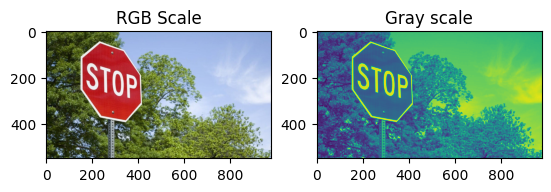

In [4]:
img=cv2.imread("image.jpg")

img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)#grayscale version
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)#rgb version

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('RGB Scale')

plt.subplot(1, 2, 2)
plt.imshow(img_gray)
plt.title('Gray scale')

plt.show()

In [5]:
#recognition
#to recognize big signs as well as small ones we will use detectMultiScale() function of open cv
data=cv2.CascadeClassifier("stop_data.xml")
found=data.detectMultiScale(img_gray,minSize=(20,20))
amount_found=len(found)

if amount_found!=0:
  for (x,y,width,height) in found:
    cv2.rectangle(img_rgb,(x,y),(x+height,y+width),(0,255,0),5)

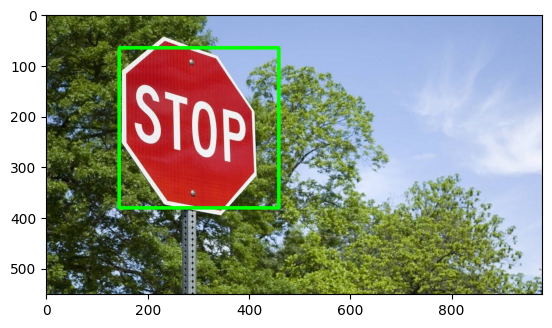

In [6]:
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()

Haar Cascade is a machine learning-based approach where a lot of positive and negative images are used to train the classifier.


Positive images – These images contain the images which we want our classifier to identify.
Negative Images – Images of everything else, which do not contain the object we want to detect

In [2]:
import numpy as np

In [3]:
face_cascade=cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier("haarcascade_eye.xml")

In [10]:
def detect_face(img):
  face_img=img.copy()
  face_rect=face_cascade.detectMultiScale(face_img,
                                          scaleFactor=1.2,
                                          minNeighbors=5)
  for (x,y,w,h) in face_rect:
    cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
    return face_img

In [11]:
def detect_eyes(img):
    eye_img=img.copy()
    eye_rect=eye_cascade.detectMultiScale(eye_img,
                                            scaleFactor = 1.2,
                                            minNeighbors = 5)
    for (x, y, w, h) in eye_rect:
        cv2.rectangle(eye_img,(x, y),
                      (x + w,y + h),(255, 255, 255),10)
    return eye_img

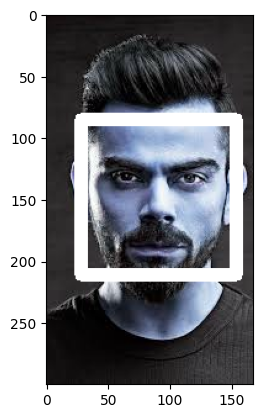

In [12]:
img=cv2.imread("face1.jfif")
img_copy=img.copy()
face=detect_face(img_copy)
plt.imshow(face)

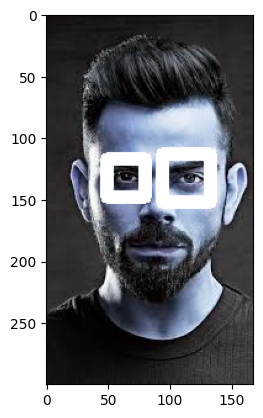

In [13]:
eyes=detect_eyes(img_copy)
plt.imshow(eyes)

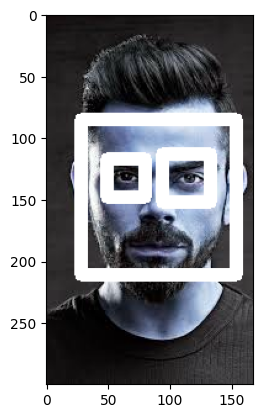

In [14]:
eyes_face=detect_face(img_copy)
eyes_face=detect_eyes(eyes_face)
plt.imshow(eyes_face)